In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('pirvision_office_dataset_clean (1).csv')

# Basic info
print(df.head())
print(df.info())
print(df.describe())


         Date      Time  Label  Temperature_F  PIR_1  PIR_2  PIR_3  PIR_4  \
0  2024-08-08  19:19:56      0             86  10269  10721  11156  11170   
1  2024-08-08  19:20:12      1             86  10364  10907  11299  11238   
2  2024-08-08  19:20:28      0             86  10329  10793  11197  11242   
3  2024-08-08  19:20:44      0             86  10169  10425  10822  11133   
4  2024-08-08  19:21:00      0             86  10320  10667  11104  11234   

   PIR_5  PIR_6  ...  PIR_46  PIR_47  PIR_48  PIR_49  PIR_50  PIR_51  PIR_52  \
0  10931  10671  ...   11178   11197   11161   11096   10957   10839   10735   
1  10867  10535  ...   11122   11145   11136   11108   11041   10824   10645   
2  11052  10658  ...   11168   11204   11162   11109   11007   10867   10700   
3  11136  10834  ...   11116   11273   11186   10984   10910   10807   10714   
4  11129  10814  ...   11006   11257   11370   11173   10924   10816   10754   

   PIR_53  PIR_54  PIR_55  
0   10590   10411   10329  


In [25]:
import pandas as pd

# Load your dataset
df = pd.read_csv('pirvision_office_dataset_clean (1).csv')

# --- Check column names ---
print("DataFrame Columns:")
print(df.columns)

# --- Try to create a proper datetime column ---
if 'Date' in df.columns and 'Time' in df.columns:
    print("Combining 'Date' and 'Time' columns...")
    df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S')
    print("'Date_Time' column created.")
elif 'Date_Time' in df.columns:
    print("'Date_Time' column found. Converting to datetime...")
    df['Date_Time'] = pd.to_datetime(df['Date_Time'])
    print("'Date_Time' column converted.")
else:
    print("Could not find 'Date_Time' or 'Date' and 'Time' columns.")
    print("Please manually identify the timestamp column(s) and adjust the code.")

# --- Extract hour and weekday ---
if 'Date_Time' in df.columns:
    df['hour'] = df['Date_Time'].dt.hour
    df['weekday'] = df['Date_Time'].dt.day_name()
    # Extract month name from Date_Time
    df['month'] = df['Date_Time'].dt.month_name()
    print("'hour' , 'month' and  'weekday' columns created.")
else:
    print("Cannot extract 'hour' and 'weekday' as 'Date_Time' column is missing.")

# --- Check for missing values ---
print("\nMissing values after datetime processing:")
print(df.isnull().sum())

# --- Display the updated DataFrame (optional) ---
print("\nSample of updated dataset:")
print(df[['Date_Time', 'hour', 'weekday','month']].head())

# Save the updated dataset to a new CSV file
df.to_csv('pirvision_office_dataset_updated.csv', index=False)

print("\nUpdated dataset saved as 'pirvision_office_dataset_updated.csv'")



DataFrame Columns:
Index(['Date', 'Time', 'Label', 'Temperature_F', 'PIR_1', 'PIR_2', 'PIR_3',
       'PIR_4', 'PIR_5', 'PIR_6', 'PIR_7', 'PIR_8', 'PIR_9', 'PIR_10',
       'PIR_11', 'PIR_12', 'PIR_13', 'PIR_14', 'PIR_15', 'PIR_16', 'PIR_17',
       'PIR_18', 'PIR_19', 'PIR_20', 'PIR_21', 'PIR_22', 'PIR_23', 'PIR_24',
       'PIR_25', 'PIR_26', 'PIR_27', 'PIR_28', 'PIR_29', 'PIR_30', 'PIR_31',
       'PIR_32', 'PIR_33', 'PIR_34', 'PIR_35', 'PIR_36', 'PIR_37', 'PIR_38',
       'PIR_39', 'PIR_40', 'PIR_41', 'PIR_42', 'PIR_43', 'PIR_44', 'PIR_45',
       'PIR_46', 'PIR_47', 'PIR_48', 'PIR_49', 'PIR_50', 'PIR_51', 'PIR_52',
       'PIR_53', 'PIR_54', 'PIR_55'],
      dtype='object')
Combining 'Date' and 'Time' columns...
'Date_Time' column created.
'hour' , 'month' and  'weekday' columns created.

Missing values after datetime processing:
Date             0
Time             0
Label            0
Temperature_F    0
PIR_1            0
                ..
PIR_55           0
Date_Time        0
h

Analyze Occupancy Patterns by Hour


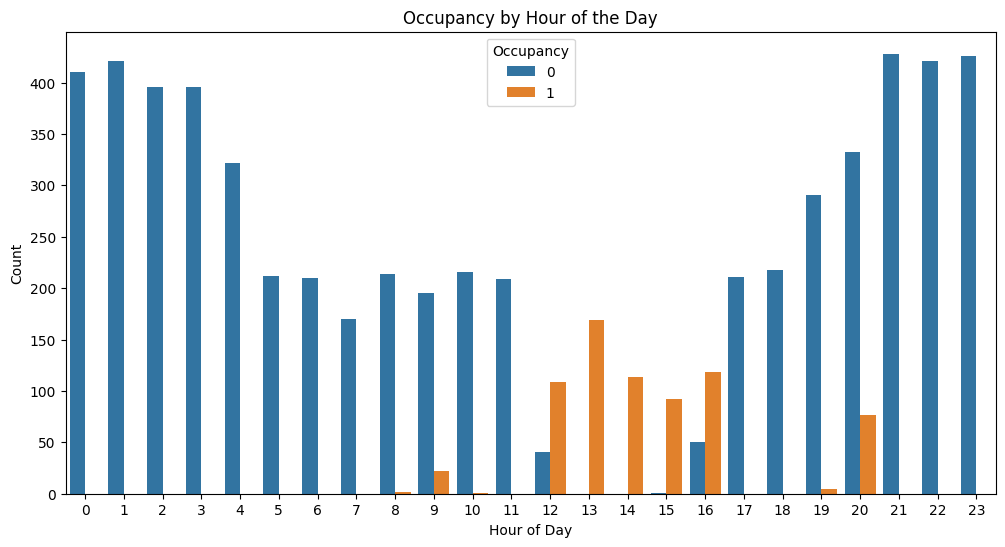

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv('pirvision_office_dataset_updated.csv')

plt.figure(figsize=(12,6))
sns.countplot(x='hour', hue='Label', data=df)
plt.title('Occupancy by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend(title='Occupancy')
plt.show()


 Analyze Occupancy Patterns by Weekday

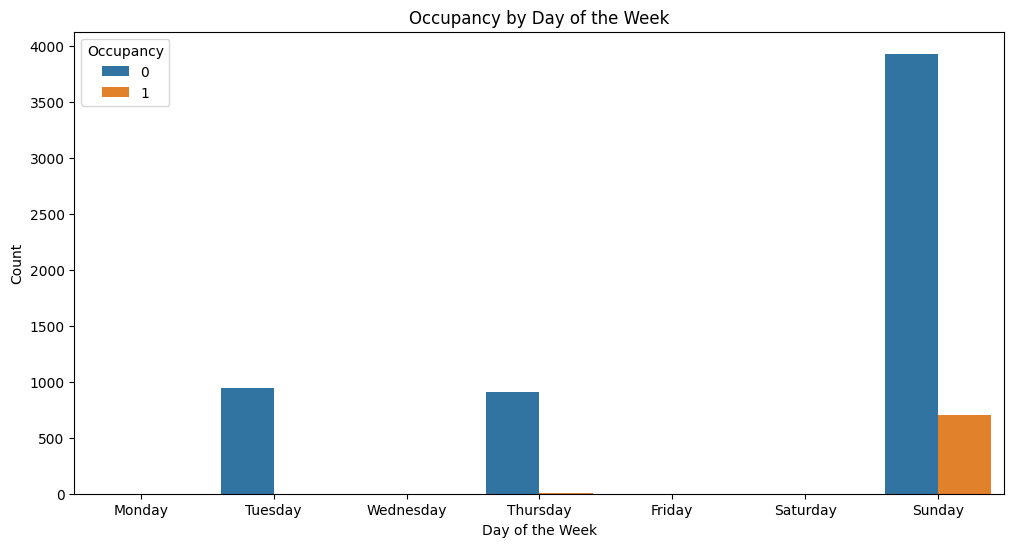

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(x='weekday', hue='Label', data=df,
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Occupancy by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Occupancy')
plt.show()


 line plot to show how often the office is occupied (Label = 1) for each day of the week.

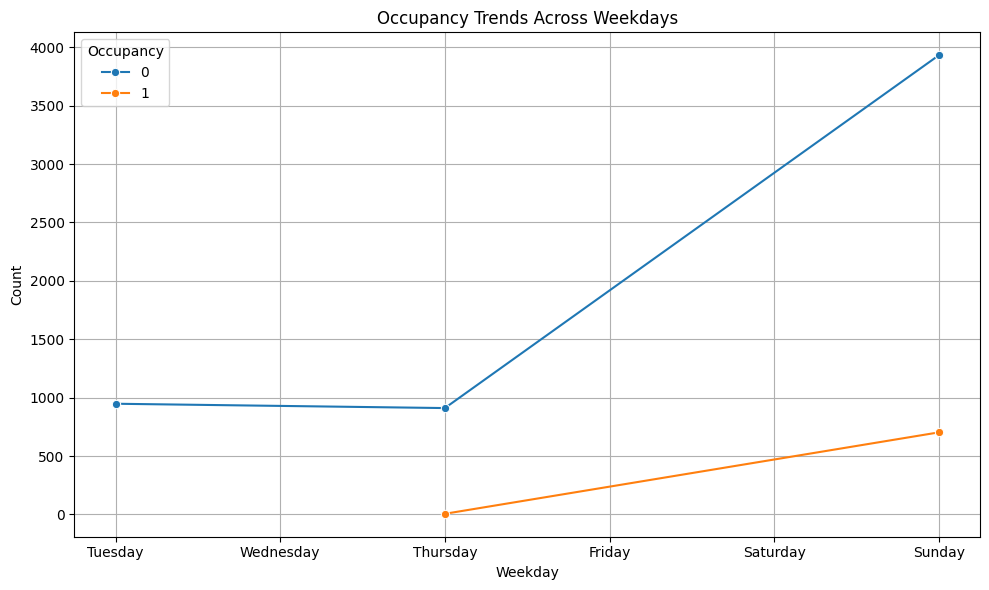

In [36]:

# Group by Label and weekday
weekday_data = df.groupby(['Label', 'weekday']).size().reset_index(name='count')

# Set weekday order for proper sorting
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_data['weekday'] = pd.Categorical(weekday_data['weekday'], categories=weekday_order, ordered=True)

# Sort the DataFrame
weekday_data = weekday_data.sort_values(['Label', 'weekday'])

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=weekday_data, x='weekday', y='count', hue='Label', marker='o')
plt.title('Occupancy Trends Across Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Occupancy')
plt.show()


Heatmap of Hour vs. Weekday

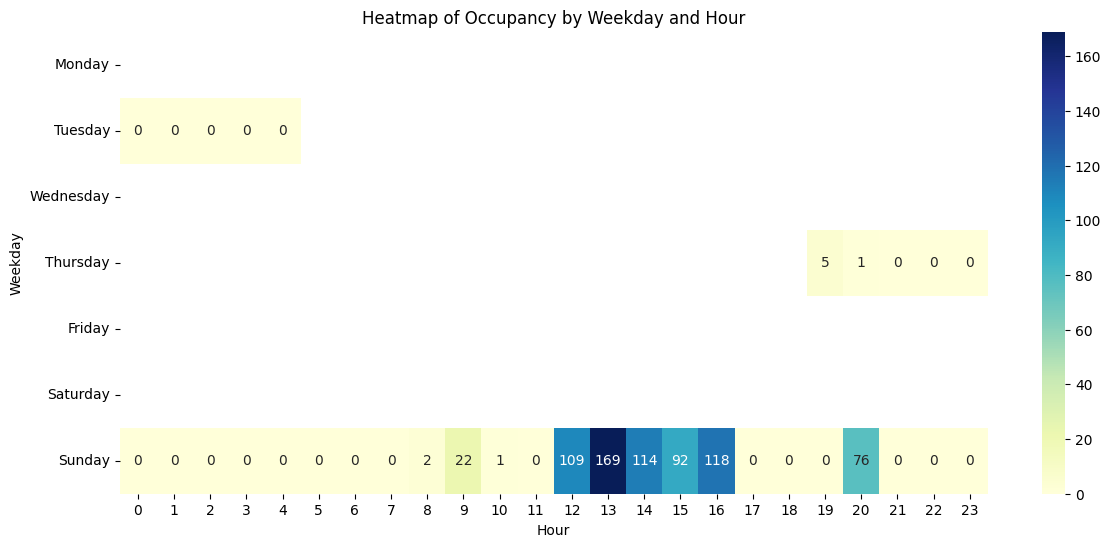

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv('pirvision_office_dataset_updated.csv')

# Heatmap of Occupancy by Weekday and Hour (original code block 21 with fix)
heatmap_data = df.groupby(['weekday', 'hour'])['Label'].sum().unstack()

# Ensure correct weekday order
heatmap_data = heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(14,6))
# Change fmt='d' to fmt='.0f' to handle potential float values and display as integers
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Occupancy by Weekday and Hour')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.show()

Visualize Occupancy by Month

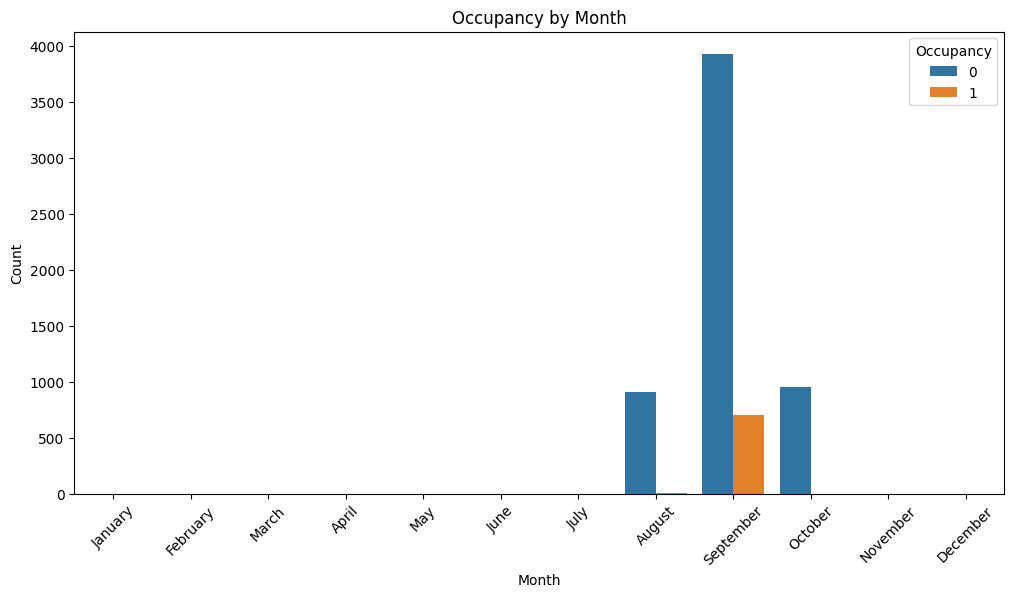

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='month', hue='Label', data=df,
              order=['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Occupancy by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Occupancy')
plt.xticks(rotation=45)
plt.show()


Show All Months + Both Occupancy Labels (0 and 1)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datetime columns are extracted
df['month'] = df['Date_Time'].dt.month_name()
df['month_number'] = df['Date_Time'].dt.month

# Group by Label, month_number, and month name
all_months = df.groupby(['Label', 'month_number', 'month']).size().reset_index(name='count')

# Create full month and label combinations to ensure missing months/labels are filled with 0
all_labels = [0, 1]
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_numbers = list(range(1, 13))

# Create full grid
full_grid = pd.MultiIndex.from_product([all_labels, month_numbers, month_names], names=['Label', 'month_number', 'month']).to_frame(index=False)

# Merge with your grouped data
full_data = pd.merge(full_grid, all_months, on=['Label', 'month_number', 'month'], how='left')
full_data['count'] = full_data['count'].fillna(0).astype(int)

# Remove mismatched month_number-month name combinations
full_data = full_data[full_data['month'] == full_data['month_number'].apply(lambda x: month_names[x-1])]

# Sort for plotting
full_data = full_data.sort_values(['Label', 'month_number'])
full_data.reset_index(drop=True, inplace=True)

# Preview
print(full_data)


    Label  month_number      month  count
0       0             1    January      0
1       0             2   February      0
2       0             3      March      0
3       0             4      April      0
4       0             5        May      0
5       0             6       June      0
6       0             7       July      0
7       0             8     August    911
8       0             9  September   3931
9       0            10    October    948
10      0            11   November      0
11      0            12   December      0
12      1             1    January      0
13      1             2   February      0
14      1             3      March      0
15      1             4      April      0
16      1             5        May      0
17      1             6       June      0
18      1             7       July      0
19      1             8     August      6
20      1             9  September    703
21      1            10    October      0
22      1            11   November

Line Plot: Compare Occupancy = 0 and Occupancy = 1 by Month

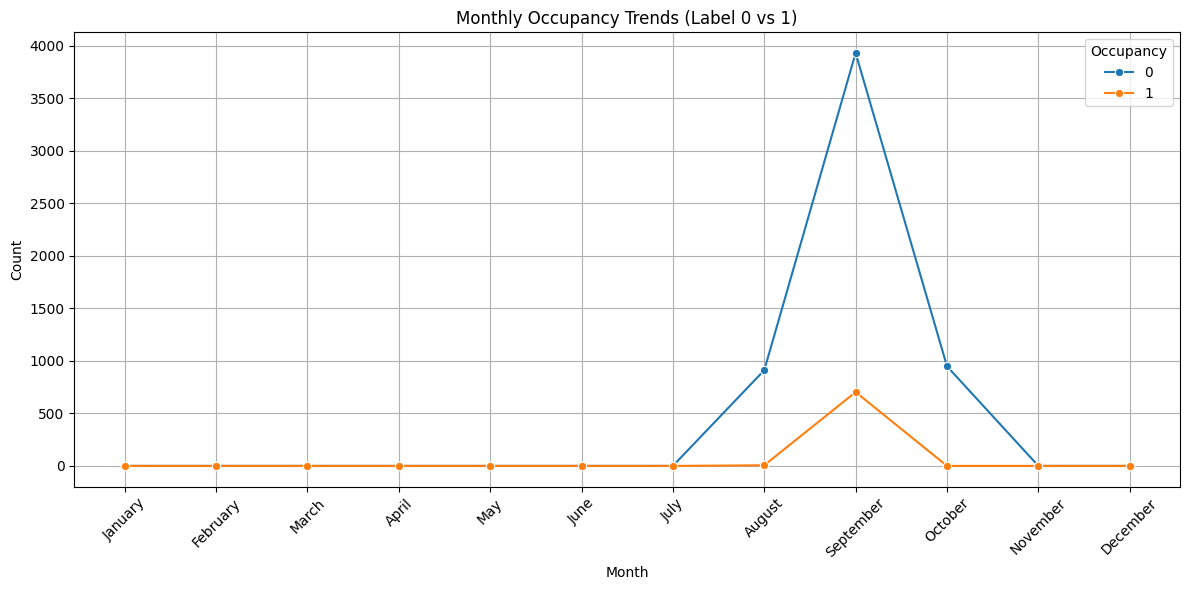

In [33]:
plt.figure(figsize=(12,6))
sns.lineplot(data=full_data, x='month', y='count', hue='Label', marker='o')
plt.title('Monthly Occupancy Trends (Label 0 vs 1)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Occupancy')
plt.tight_layout()
plt.grid(True)
plt.show()


machine learning model to predict occupancy
Predict whether a room is occupied (Label = 1) or not (Label = 0) using features like:

Hour of the day

Day of the week

Month
We'll convert categorical features (weekday, month) into numeric form using One-Hot Encoding, and keep hour as-is.
Algorithm Used: Random Forest Classifier (easy to use, performs well)

Input Features: hour, weekday, month (categorical + numerical)

Output: Prediction of occupancy (0 or 1)

In [37]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure datetime features are extracted
df['hour'] = df['Date_Time'].dt.hour
df['weekday'] = df['Date_Time'].dt.day_name()
df['month'] = df['Date_Time'].dt.month_name()

# Define features and target
X = df[['hour', 'weekday', 'month']]
y = df['Label']

# Preprocessing: One-hot encode categorical features
categorical_features = ['weekday', 'month']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # keep hour as is
)

# Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1157
           1       0.87      0.86      0.87       143

    accuracy                           0.97      1300
   macro avg       0.93      0.92      0.92      1300
weighted avg       0.97      0.97      0.97      1300


Confusion Matrix:
 [[1139   18]
 [  20  123]]


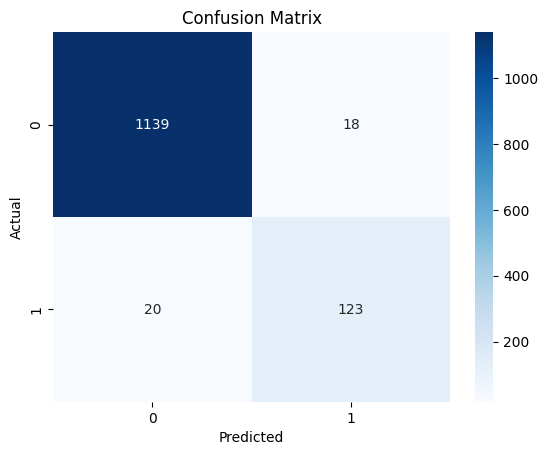

In [38]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
